In [1]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import sklearn
from PIL import Image
from keras.applications.mobilenet import MobileNet , preprocess_input
from keras.models import Model
from keras.layers import Flatten , Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
from keras.losses import categorical_crossentropy
print(1)

1


In [5]:
#Build Model

def read_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                img = img.resize((224,224))
                img_array = np.array(img)
                images.append(img_array)
    return np.array(images)



In [6]:
train_data_generator = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, horizontal_flip = True, rescale = 1./255)

train_data  = train_data_generator.flow_from_directory(directory = "./dataset/train", target_size = (224,224),batch_size = 32)
print(train_data.class_indices)

val_data_generator = ImageDataGenerator(rescale = 1./255)
val_data = val_data_generator.flow_from_directory(directory = './dataset/test',target_size = (224,224) , batch_size = 32)
print(val_data.class_indices)

Found 28709 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [5]:
base_model = MobileNet(input_shape = (224,224,3),include_top = False)
for layer in base_model.layers:
    layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(units = 7, activation = "softmax")(x)


model = Model(base_model.input, x)


print(1)


1


In [6]:

model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy'])

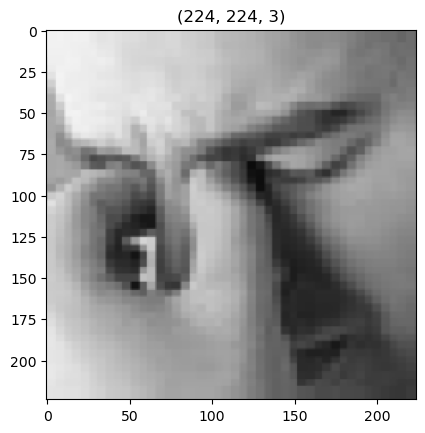

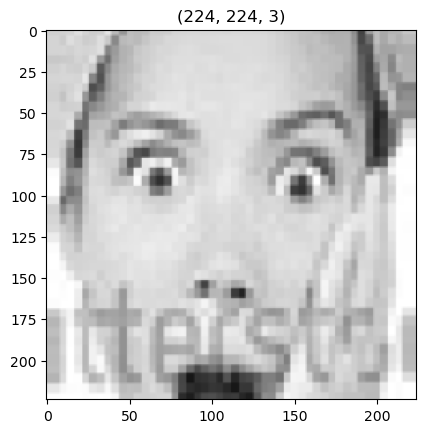

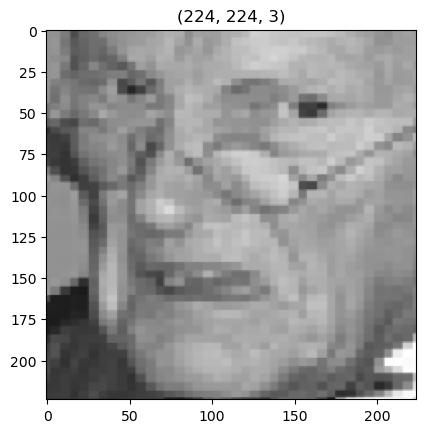

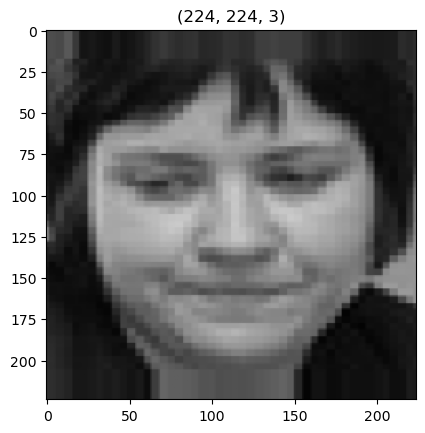

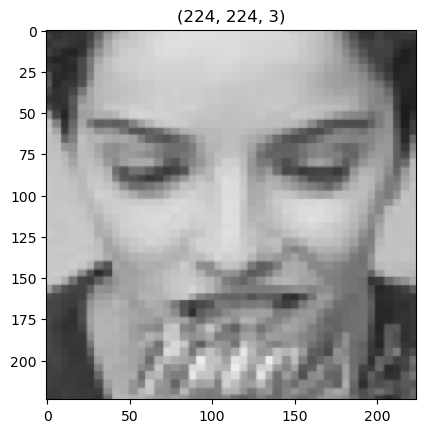

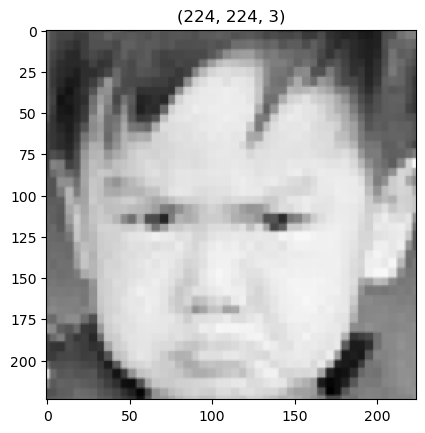

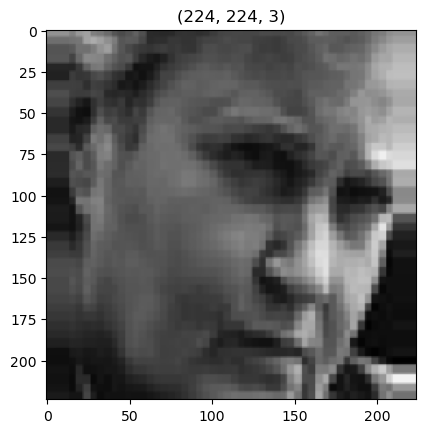

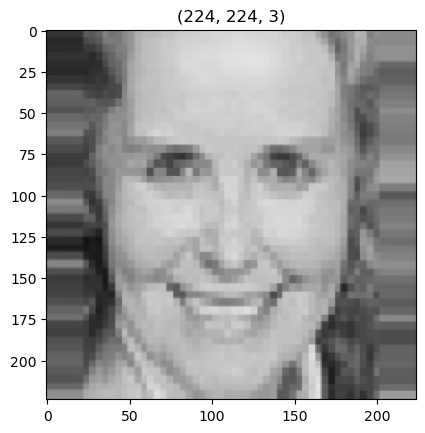

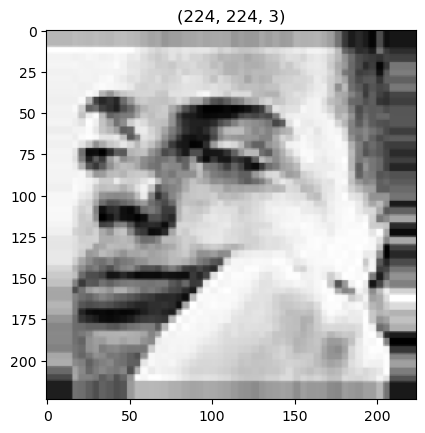

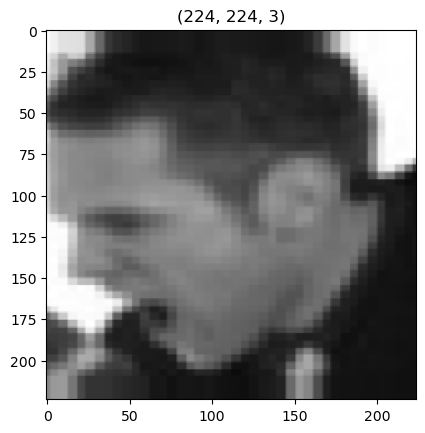

In [6]:
t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)
     

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [8]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 5, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 8s 522ms/step - loss: 16.3968 - accuracy: 0.1312 - val_loss: 19.6272 - val_accuracy: 0.1680

Epoch 00001: val_accuracy improved from -inf to 0.16797, saving model to best_model.h5
Epoch 2/50
5/5 [==============================] - 2s 446ms/step - loss: 13.9246 - accuracy: 0.2000 - val_loss: 18.1811 - val_accuracy: 0.2148

Epoch 00002: val_accuracy improved from 0.16797 to 0.21484, saving model to best_model.h5
Epoch 3/50
5/5 [==============================] - 2s 429ms/step - loss: 14.0953 - accuracy: 0.2937 - val_loss: 11.9927 - val_accuracy: 0.3633

Epoch 00003: val_accuracy improved from 0.21484 to 0.36328, saving model to best_model.h5
Epoch 4/50
5/5 [==============================] - 2s 400ms/step - loss: 12.9650 - accuracy: 0.3562 - val_loss: 10.0873 - val_accuracy: 0.3672

Epoch 00004: val_accuracy improved from 0.36328 to 0.36719, saving model to best_model.h5
Epoch 5/50
5/5 [==============================] - 2s 392ms/step - loss:

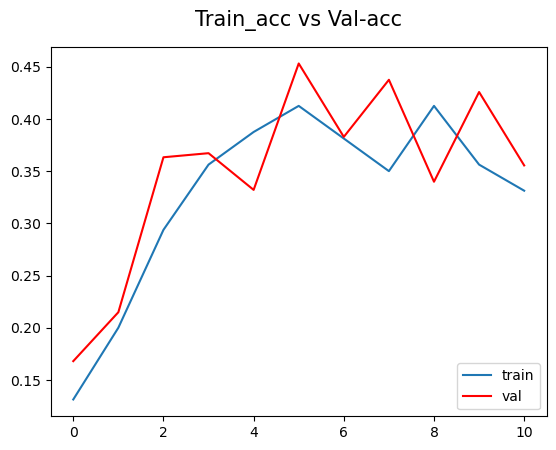

In [13]:

h =  hist.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("Train_acc vs Val-acc",fontsize = 15,pad = 15,loc = "center")
plt.legend(['train','val'],loc = 'lower right')
plt.show()

In [2]:
from keras.models import load_model
model = load_model("best_model.h5")


In [3]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

NameError: name 'train_data' is not defined

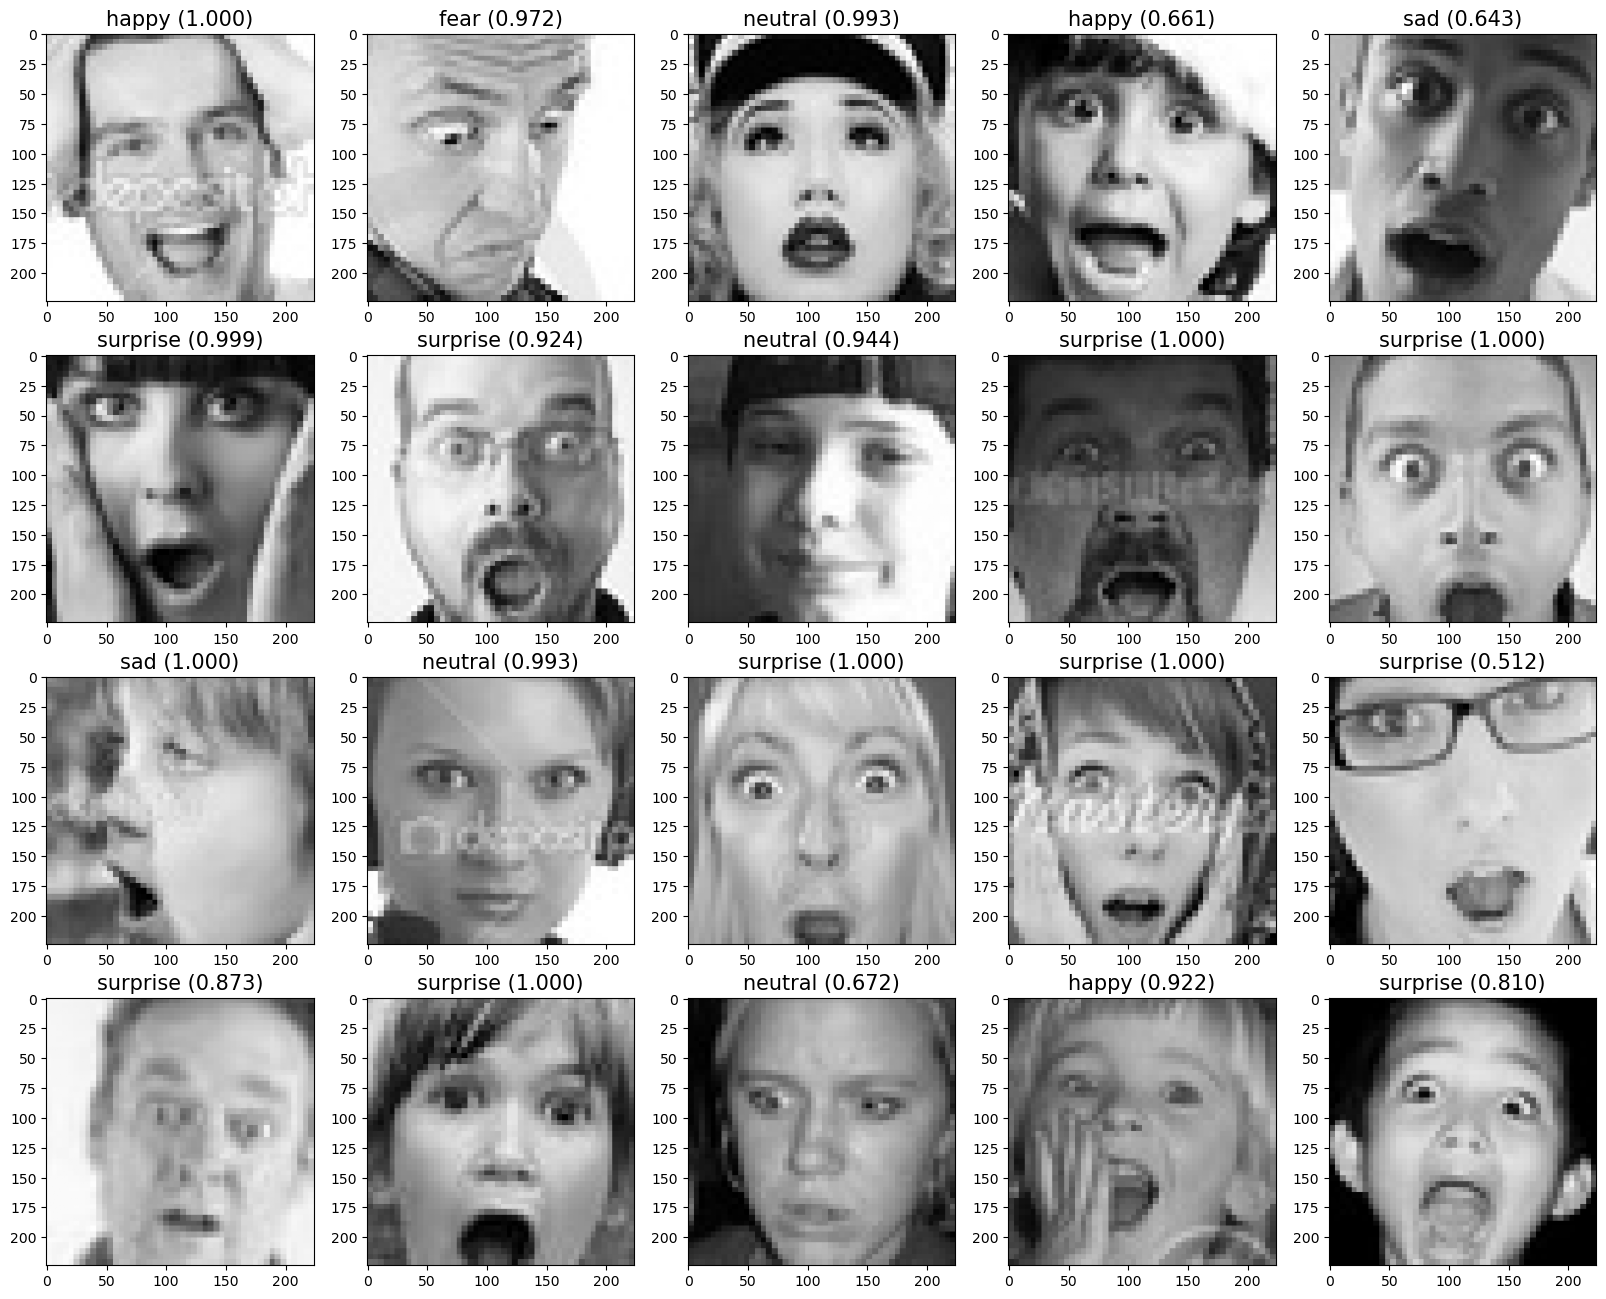

In [7]:

# path for the image to see if it predics correct class

path = "./dataset/test/surprise/"
test_sequences = read_images(path)
# img = load_img(path, target_size=(224,224) )

emotion_labels = ["anger", "disgust", "fear", "happy","neutral", "sad", "surprise"]
images = []
for file_name in os.listdir(path)[10:30]:
    if file_name.endswith(".jpg"):
        image_path = os.path.join(path, file_name)
        image = load_img(image_path, target_size=(224, 224))  # resize image to match MobileNet input size
        image = img_to_array(image)
        image = preprocess_input(image)
        images.append(image)
input_images = np.stack(images, axis=0)        
num_images = input_images.shape[0]
predictions = model.predict(input_images)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
for i in range(num_images):
    row = i // 5
    col = i % 5
    image = (input_images[i] + 1) / 2  # undo preprocessing to show the original image
    prediction = predictions[i]
    emotion_label = np.argmax(prediction)
    emotion_prob = prediction[emotion_label]
    emotion_name = emotion_labels[emotion_label]  # convert integer label to word label
    axes[row, col].imshow(image)
    axes[row, col].set_title("%s (%.3f)" % (emotion_name, emotion_prob),fontsize = 15)
    
plt.show()

In [8]:
import cv2
model  = load_model('best_model.h5')
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>